<a href="https://colab.research.google.com/github/NehaKoppikar/AnalyzingCloudComputingPlatforms/blob/main/Analyzing_Cloud_Platforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as data
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reference
1. Python Financial Analysis by [Keith Chan]( https://www.linkedin.com/in/keith-chan-79a214121/). [Link to the first part](https://medium.com/analytics-vidhya/beginners-python-financial-analysis-walk-through-part-1-cbc89be80fbe)

In [ ]:
# Set the start and end dates for your analysis. The end date is set to current day by default
start_date = '2018-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')
# List the ticker symbols you are interested in (as strings) 
tickers = ["CRM", "AMZN", "MSFT", "GOOGL", "IBM"] # Salesforce, Amazon, Microsoft, Google, IBM
# I want to store each df separately to do Bollinger band plots later on
each_df = {}
for ticker in tickers:
    each_df[ticker] = data.DataReader(ticker, 'yahoo', start_date, end_date)
# Concatenate dataframes for each ticker together to create a single dataframe called stocks
stocks = pd.concat(each_df, axis=1, keys = tickers)
# Set names for the multi-index 
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [ ]:
stocks.head()

Ticker Symbol         CRM              ...        IBM            
Stock Info           High         Low  ...     Volume   Adj Close
Date                                   ...                       
2018-01-02     104.699997  102.269997  ...  4202500.0  133.803574
2018-01-03     106.139999  104.620003  ...  9441600.0  137.481537
2018-01-04     107.660004  105.769997  ...  7556200.0  140.266037
2018-01-05     108.300003  107.199997  ...  5195800.0  140.951324
2018-01-08     109.139999  107.570000  ...  5237500.0  141.801422

[5 rows x 30 columns]

In [ ]:
stocks.shape

(780, 30)

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 2018-01-02 to 2021-02-05
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (CRM, High)         780 non-null    float64
 1   (CRM, Low)          780 non-null    float64
 2   (CRM, Open)         780 non-null    float64
 3   (CRM, Close)        780 non-null    float64
 4   (CRM, Volume)       780 non-null    int64  
 5   (CRM, Adj Close)    780 non-null    float64
 6   (AMZN, High)        780 non-null    float64
 7   (AMZN, Low)         780 non-null    float64
 8   (AMZN, Open)        780 non-null    float64
 9   (AMZN, Close)       780 non-null    float64
 10  (AMZN, Volume)      780 non-null    int64  
 11  (AMZN, Adj Close)   780 non-null    float64
 12  (MSFT, High)        780 non-null    float64
 13  (MSFT, Low)         780 non-null    float64
 14  (MSFT, Open)        780 non-null    float64
 15  (MSFT, Close)       780 non-null    fl

In [ ]:
stocks.describe().transpose().style.format("{:.2f}")

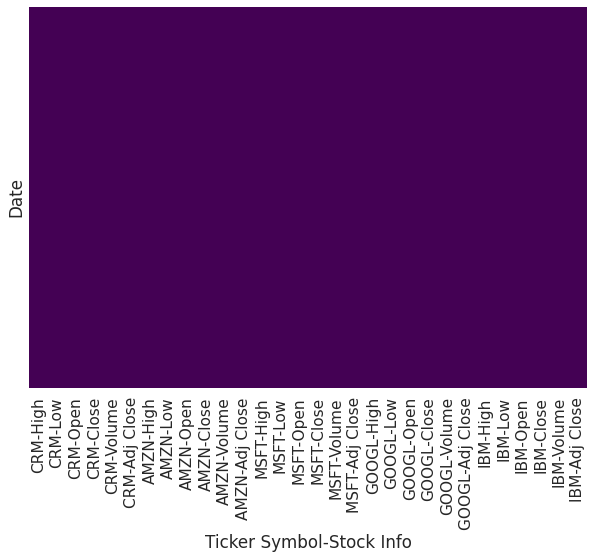

In [ ]:
# Checking for missing values
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
plt.tight_layout()
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap="viridis")

No null values

In [ ]:
# Create a dataframe for the closing_prices of the stocks
closing_prices_df = stocks.xs(key='Adj Close',axis=1,level=1)

In [1]:
# # Create a dataframe for the closing_prices of the stocks
# closing_prices_df = stocks.xs(key='Adj Close',axis=1,level=1)
# # Using plotly to create line plot of stock closing prices over time. 
# # You can double click on the ticker symbols in the legend to isolate each ticker

# fig = px.line(closing_prices_df, x=closing_prices_df.index, y=closing_prices_df.columns, title="Adjusted Closing Prices") 
# fig.update_layout(hovermode="x",yaxis_title="Price")
# fig.show()

In [ ]:
import plotly.graph_objects as go
# User input ticker of interest
ticker = "CRM"
fig = go.Figure(data=[go.Candlestick(x=each_df[ticker].index,
                open=each_df[ticker]['Open'],
                high=each_df[ticker]['High'],
                low=each_df[ticker]['Low'],
                close=each_df[ticker]['Close'])])
fig.update_layout(
    title='Candlestick Chart for ' + ticker,
    yaxis_title='Price',
    xaxis_title='Date',
    hovermode='x'
)
fig.show()

In [ ]:
# Create a new df called returns that calculates the return after each day.
returns = pd.DataFrame()
# We can use pandas pct_change() method on the 'Adj Close' column to create a column representing this return value. 
for ticker in tickers:
    returns[ticker]=closing_prices_df[ticker].pct_change()*100

In [ ]:
returns.tail().style.format("{:.2f}")

,CRM,AMZN,MSFT,GOOGL,IBM
Date,,,,,
2021-02-01 00:00:00,1.29,4.26,3.32,3.60,1.20
2021-02-02 00:00:00,2.51,1.11,-0.06,1.38,-0.91
2021-02-03 00:00:00,0.26,-2.00,1.46,7.28,-0.27
2021-02-04 00:00:00,1.35,0.56,-0.41,-0.25,1.60
2021-02-05 00:00:00,0.38,0.63,0.08,1.71,0.64


In [ ]:
returns.mean()

CRM      0.135749
AMZN     0.154810
MSFT     0.158987
GOOGL    0.104718
IBM      0.006274
dtype: float64

In [ ]:
# Date of worst single day returns for each company.
worst = returns.idxmin()
# Date of best single day returns for each company.
best = returns.idxmax()
# Create a dataframe to see best and worst day returns by company
best_and_worst_returns = pd.DataFrame({"Worst":worst, "Best":best})
best_and_worst_returns.columns.names = ['Single Day Returns']
best_and_worst_returns.index.names = ['Ticker']
best_and_worst_returns

Single Day Returns,Worst,Best
Ticker,,
CRM,2020-03-16,2020-08-26
AMZN,2020-03-12,2018-12-26
MSFT,2020-03-16,2020-03-13
GOOGL,2020-03-16,2019-07-26
IBM,2020-03-12,2020-03-24


The best and worst days are almost same as it is the same industry.<br>
The companies had their best days before COVID (except Salesforce and IBM)

In [ ]:
# Measuring volatality of the stocks
returns.std()

Ticker
CRM      2.444567
AMZN     2.084003
MSFT     2.022774
GOOGL    1.958483
IBM      1.909116
dtype: float64

In [ ]:
############ Pre-COVID and Post-COVID Analysis

# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
std_2020 = returns.loc['2020-01-01':'2020-08-01'].std()
# as compared to the same time period in 2019
std_2019 = returns.loc['2019-01-01':'2019-08-01'].std()
# Create a dataframe to compare year to year stdev by company
std_comparison_df = pd.DataFrame({"2019":std_2019, "2020":std_2020})
std_comparison_df.columns.names = ['Std Over Years Comparison']
std_comparison_df.index.names = ['Ticker']
std_comparison_df

Std Over Years Comparison,2019,2020
Ticker,,
CRM,1.770247,3.269830
AMZN,1.598930,2.592967
MSFT,1.319324,3.241620
GOOGL,1.697803,2.798763
IBM,1.274036,3.073795


In [2]:
# # User input ticker of interest
# ticker = "CRM"
# a = returns[ticker].loc["2020–01–03":"2020–07–01"].dropna()
# b = returns[ticker].loc["2019–01–03":"2019–07–01"].dropna()
# plt.figure(figsize = (10,7))
# a.plot(kind="hist", label="2020", bins=50, alpha=0.5)
# b.plot(kind="hist", label="2019", bins=12, alpha=0.5)
# plt.title("Distribution of " + ticker + "returns")
# plt.xlabel("Daily Returns (%)")
# plt.legend()
# plt.show()

In [ ]:
fig = px.scatter(returns, x=returns.mean(), y=returns.std(), text=returns.columns, size_max=60, labels={
                     "x": "Daily Expected Returns (%)",
                     "y": "Risk",
                 },
                title="Stock Risk Vs Returns")
fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.005, 0.01])
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')#, range=[-0.01, 0.1])
fig.update_traces(textposition='top center')
fig.show()